<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

_Author: Unknown_

------

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Create function plot graph
def plot_graph(model_values):
    ''' 
    Input : Model_values of keras.callbacks.History
    Return : Graph of Loss funtion and Mean squared error between training dataset and testing dataset
    '''
    # Subplots
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(model_values.history['loss'], label='Training Loss');
    plt.plot(model_values.history['val_loss'], label='Testing Loss');
    plt.legend(fontsize=12)
    plt.title('Loss of Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss');
    
    # Plot MSE
    plt.subplot(1, 2, 2)
    plt.plot(model_values.history['mse'], label='Train MSE')
    plt.plot(model_values.history['val_mse'], label='Test MSE')
    plt.legend(fontsize=12)
    plt.title('Mean Squared Error of Training and Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error');

In [3]:
# Load dataset
cali = fetch_california_housing()
X, y = cali.data, cali.target

In [4]:
# Check data
type(cali)

sklearn.utils.Bunch

In [5]:
# Check data
# features 
type(X)

numpy.ndarray

In [6]:
# Check data
# target
type(y)

numpy.ndarray

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [7]:
# Create dataframe
cali_df = pd.DataFrame(X, columns=cali.feature_names)

In [8]:
# Check 5 top row
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# Check 5 last row
cali_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [10]:
# Check shape
cali_df.shape

(20640, 8)

In [11]:
# Check overall
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
# add the target feature and name this price
cali_df['price'] = y

In [13]:
# Recheck
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

<AxesSubplot:>

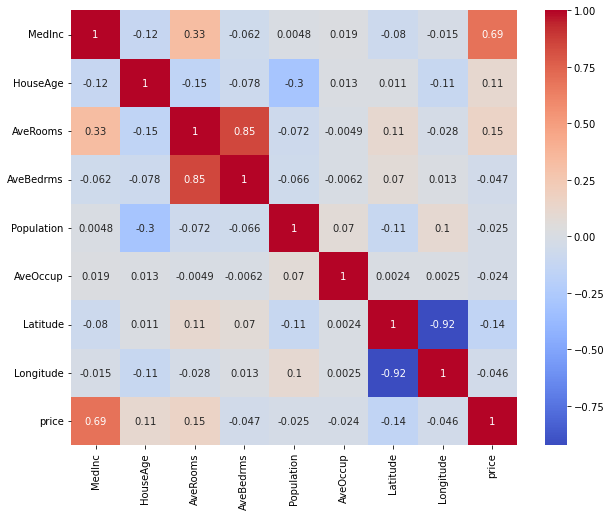

In [14]:
# Create heatmap for selected some features
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cali_df.corr(), annot=True, cmap="coolwarm")

# Select Medlnc, HouseAge and AveRooms 
# Because there are high correlation with price

In [15]:
# Define X and y
X = cali_df[['MedInc', 'HouseAge', 'AveRooms']]
y = cali_df["price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42)

In [16]:
# Check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 3), (5160, 3), (15480,), (5160,))

In [17]:
# Scale data
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [18]:
# Insert model
model = Sequential()

# Input layer 
model.add(Dense(3, # base 2 and > # of features
                activation='relu', # ReLU for all hidden layers
                input_shape=(3,))) # Base 3 features

# Hidden layer
model.add(Dense(24,activation='relu'))

# Output layer with one neuron (node)
model.add(Dense(1, activation=None))

Set up the compilation of the network.  Use an `adam` optimizer and appropriate loss function with the mean squared error metric.

In [19]:
# Compile
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mse'])

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [20]:
# fit model
history = model.fit(X_train_sc, y_train,
                   epochs=100,
                   verbose=0,
                   validation_data=(X_test_sc,y_test))

In [36]:
type(history)

keras.callbacks.History

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

In [21]:
# Check key
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

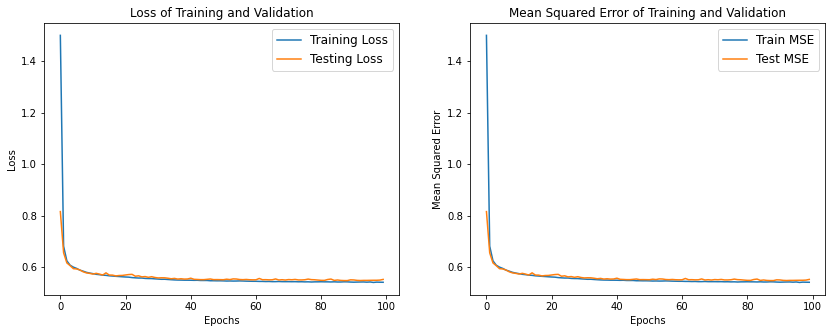

In [22]:
plot_graph(history)

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `ReLU` activation function.

In [23]:
# instantiate model_3 with 3 layers
model_2 = Sequential()
# Input layer 
model_2.add(Dense(3, 
                activation='relu', 
                input_shape=(3,)))

# Hidden layers
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(128, activation= 'relu'))
model_2.add(Dense(64, activation='relu'))

# Output layer with one neuron (node)
model_2.add(Dense(1, activation=None))

In [24]:
# Compile
model_2.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mse'])

In [25]:
# fit model
history_2 = model_2.fit(X_train_sc, y_train,
                       epochs=100,
                       verbose=0,
                       validation_data=(X_test_sc,y_test))

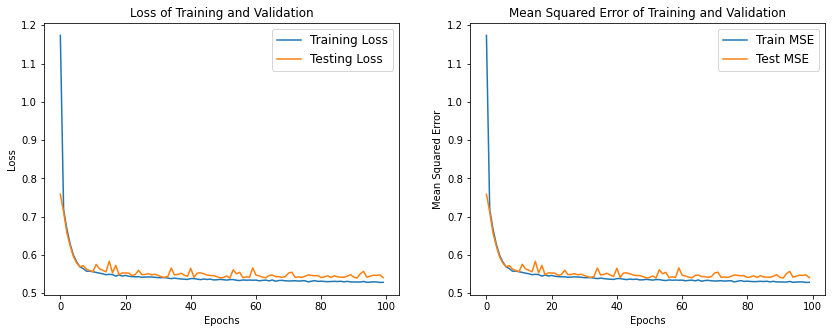

In [26]:
plot_graph(history_2)

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

In [27]:
# Topology
model_3 = Sequential()
model_3.add(Dense(3, 
            activation='relu', 
            input_shape=(3,)))
model_3.add(BatchNormalization())
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(128, activation= 'relu'))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(1))

# compile
model_3.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])
# fit model
history_3 = model_3.fit(X_train_sc, y_train,
                       epochs=100,
                       verbose=0,
                       validation_data=(X_test_sc,y_test))

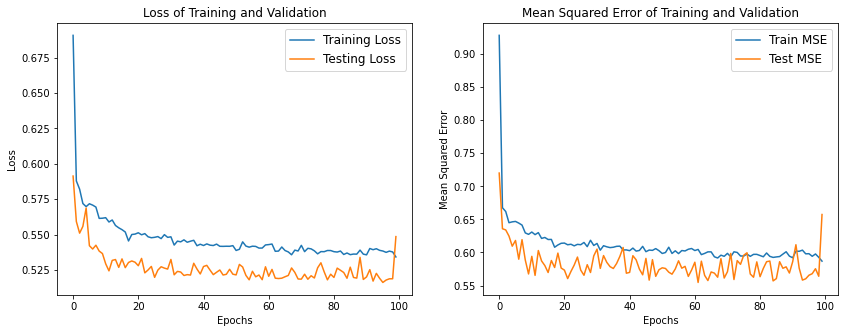

In [28]:
plot_graph(history_3)

##### Does this change anything?

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [29]:
early_stop = EarlyStopping(patience=5)

In [30]:
# Topology
model_4 = Sequential()
model_4.add(Dense(3, 
            activation='relu', 
            input_shape=(3,)))
model_4.add(BatchNormalization())
model_4.add(Dense(64,activation='relu'))
model_4.add(Dense(128, activation= 'relu'))
model_4.add(Dense(64,activation='relu'))
model_4.add(Dense(1))

# compile
model_4.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])
# fit model
history_4 = model_4.fit(X_train_sc, y_train,
                       epochs=100,
                       verbose=0,
                       validation_data=(X_test_sc,y_test),
                       callbacks=[early_stop])

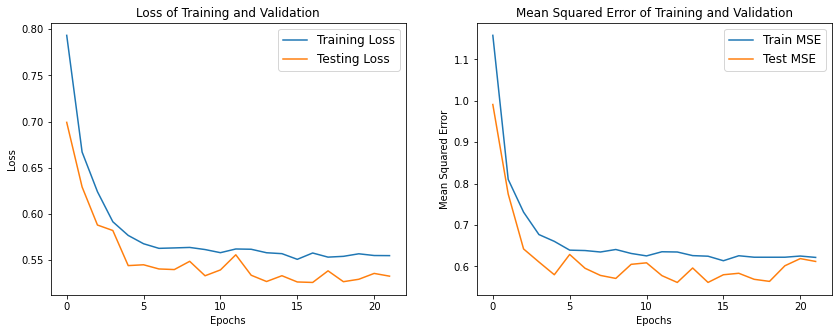

In [31]:
plot_graph(history_4)

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [32]:
# Topology
es = EarlyStopping(patience=5)
model_5 = Sequential()
model_5.add(Dense(3, 
            activation='relu', 
            input_shape=(3,)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.05))
model_5.add(Dense(64,activation='relu'))
model_5.add(Dropout(0.20))
model_5.add(Dense(128, activation= 'relu'))
model_5.add(Dense(64,activation='relu'))
model_5.add(Dense(1, activation=None))

# compile
model_5.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])
# fit model
history_5 = model_5.fit(X_train_sc, y_train,
                       epochs=100,
                       verbose=0,
                       validation_data=(X_test_sc,y_test),
                       callbacks=[early_stop])

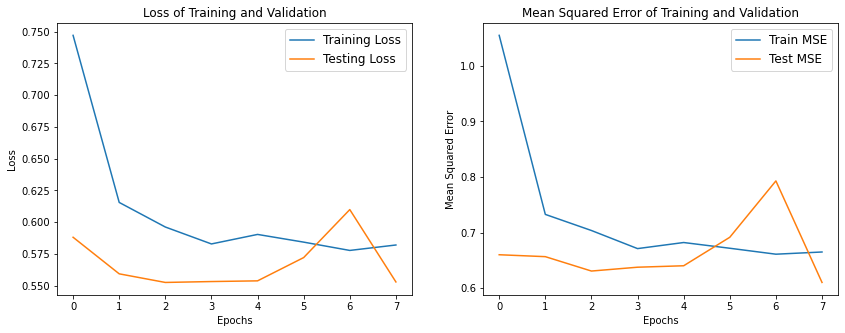

In [33]:
plot_graph(history_5)

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [37]:
# Baseline
y_train_preds_base = model.predict(X_train_sc)
y_test_preds_base = model.predict(X_test_sc)

162/162 [==============================] - 0s 887us/step


In [38]:
# Model 5 There is more Hidden layer, BatchNormalization and 
# Regularization Early Stopping, Droupout
y_train_preds_5 = model_5.predict(X_train_sc)
y_test_preds_5 = model_5.predict(X_test_sc)

162/162 [==============================] - 0s 1ms/step


In [42]:
print(f'RMSE of training the baseline is {round(mean_squared_error(y_train, y_train_preds_base, squared=False),3)}.') 
print(f'RMSE of testing the baseline is {round(mean_squared_error(y_test, y_test_preds_base, squared=False),3)}.') 
print()
print(f'RMSE of training the model 5 is {round(mean_squared_error(y_train, y_train_preds_5, squared=False),3)}.') 
print(f'RMSE of testing the model 5 is {round(mean_squared_error(y_test, y_test_preds_5, squared=False),3)}.') 

# No overfitting in baseline model and model 5
# RMSE of baseline is lower than model 5
# Thus baseline model is better than model 5

RMSE of training the baseline is 0.737.
RMSE of testing the baseline is 0.744.

RMSE of training the model 5 is 0.777.
RMSE of testing the model 5 is 0.781.


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [34]:
# Topology
model_reg = Sequential()
model_reg.add(Dense(3, 
            activation='relu', 
            input_shape=(3,)))
model_reg.add(BatchNormalization())
model_reg.add(Dense(64,activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dense(128, activation= 'relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(0.05))
model_reg.add(Dense(64,activation='relu', kernel_regularizer=l2(0.01)))
model_reg.add(Dropout(.20))
model_reg.add(Dense(1))

# compile
model_reg.compile(loss='mae', 
                optimizer='adam', 
                metrics=['mse'])

# fit model with early stopping
history_reg = model_reg.fit(X_train, y_train, 
                         validation_data=(X_test, y_test), 
                         epochs=100,
                         verbose=0,
                         callbacks=[early_stop])

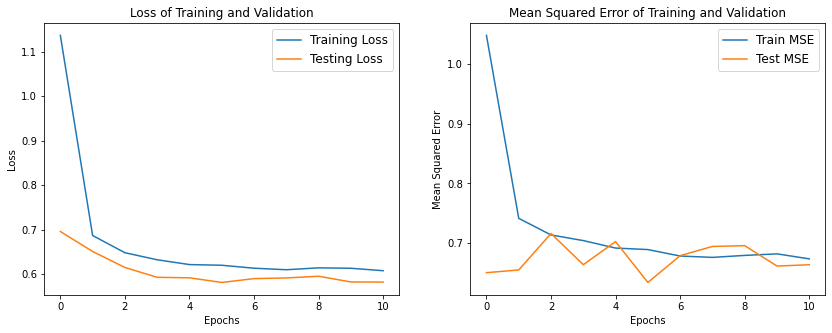

In [43]:
plot_graph(history_reg)

In [44]:
# Model reg There is more Hidden layer, BatchNormalization and 
# Regularization Early Stopping, Droupout Ridge
y_train_preds_reg = model_reg.predict(X_train_sc)
y_test_preds_reg = model_reg.predict(X_test_sc)

162/162 [==============================] - 0s 968us/step


In [45]:
print(f'RMSE of training the baseline is {round(mean_squared_error(y_train, y_train_preds_base, squared=False),3)}.') 
print(f'RMSE of testing the baseline is {round(mean_squared_error(y_test, y_test_preds_base, squared=False),3)}.') 
print()
print(f'RMSE of training the model final is {round(mean_squared_error(y_train, y_train_preds_reg, squared=False),3)}.') 
print(f'RMSE of testing the model final is {round(mean_squared_error(y_test, y_test_preds_reg, squared=False),3)}.') 

# No overfitting in baseline model and model 5
# RMSE of baseline is lower than model final

# Might be when the model has more layer(node) for predict the target
# After that backpropagation section for update weight in each node
# Then early nodes can not use to predict because It's low weight 

# In other ways input data can well predict for price and not overfitiing
# Because features have a correlation with target(price)

# Thus baseline model is the best model to predict
# Select baseline model for predict price(target) in dataset cali_df

RMSE of training the baseline is 0.737.
RMSE of testing the baseline is 0.744.

RMSE of training the model final is 1.251.
RMSE of testing the model final is 1.248.


### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [47]:
# Save model
model.save('cali_housing.h5')

---